In [ ]:
import os
import keras
from keras.preprocessing import image
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model

# Load your pre-trained CNN model
model = load_model('CNN_relu-test.h5')

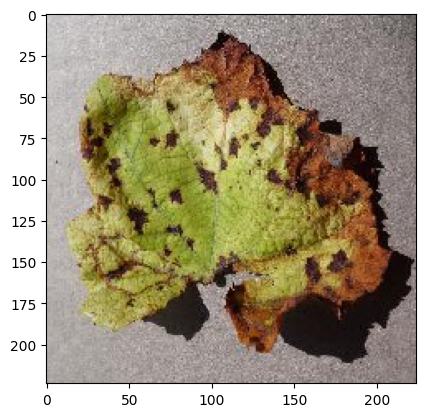

In [ ]:
img_path = (r"C:/Users/hkmeh/Grape/test/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/2a1f4716-f593-487a-b944-363d3f5af429___FAM_L.Blight 4809.JPG")

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
img = image.img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
img = img/255.0


In [ ]:
preds = model.predict(img)
print(preds)

1/1 [==============================] - 0s 261ms/step
[[5.6764726e-10 4.0922239e-07 9.9997258e-01 2.7022994e-05]]


In [ ]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer()

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(img[0].astype('double'), model.predict, top_labels=4, hide_color=0, num_samples=500)


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 137ms/step
CPU times: total: 1min 3s
Wall time: 10.4 s


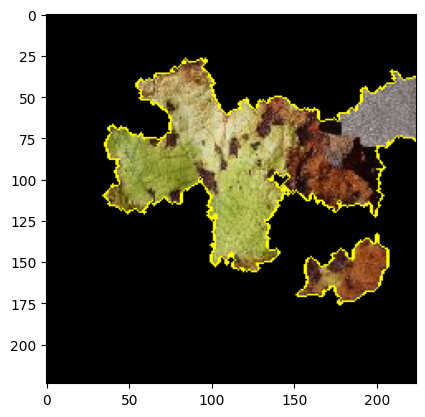

In [ ]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp , mask))

Text(0.5, 1.0, '')

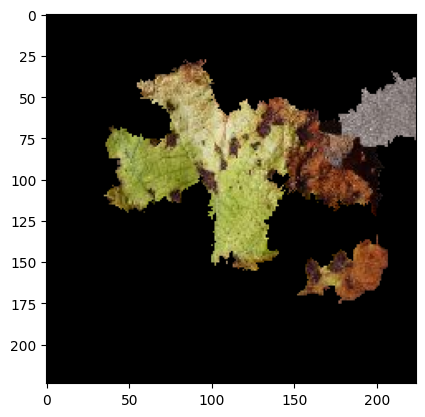

In [ ]:
plt.imshow(temp, cmap='gray')
plt.title('')

Text(0.5, 1.0, 'LIME Mask')

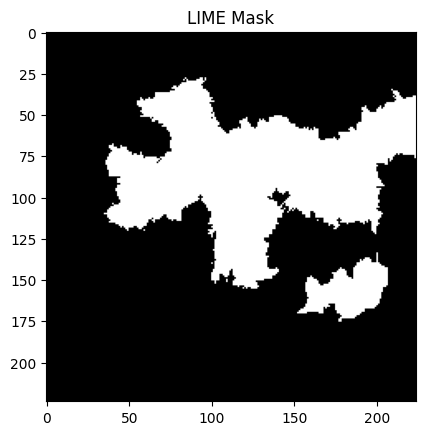

In [ ]:
plt.imshow(mask, cmap='gray')
plt.title('LIME Mask')

Text(0.5, 1.0, 'LIME Mask')

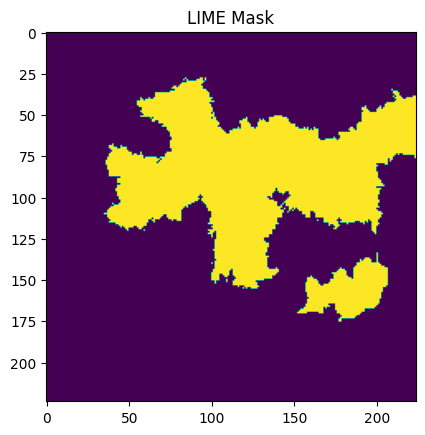

In [ ]:
plt.imshow(mask)
plt.title('LIME Mask')

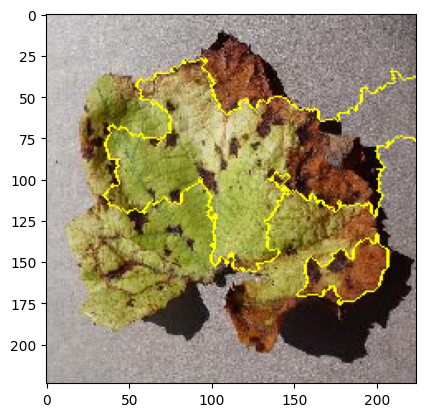

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

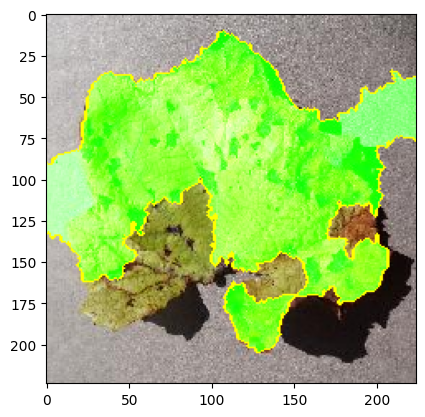

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

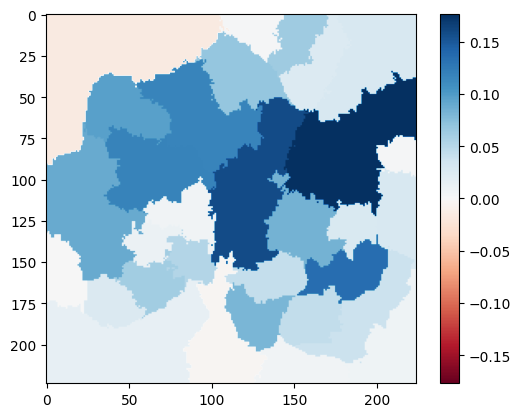

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()